In [127]:
# Fix binary incompatibility between numpy and pandas
# Uninstall both, then reinstall compatible versions
!pip uninstall -y numpy pandas
!pip install "numpy==1.26.4" "pandas==2.1.4"
import numpy as np
import pandas as pd
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.1.4
Uninstalling pandas-2.1.4:
  Successfully uninstalled pandas-2.1.4


You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached pandas-2.1.4-cp312-cp312-win_amd64.whl.metadata (18 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Using cached pandas-2.1.4-cp312-cp312-win_amd64.whl (10.5 MB)
NumPy version: 1.26.4
Pandas version: 2.1.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
camelot-py 1.0.0 requires pandas>=2.2.2; python_version >= "3.10", but you have pandas 2.1.4 which is incompatible.
libretranslate 1.6.5 requires packaging==23.1, but you have packaging 25.0 which is incompatible.
libretranslate 1.6.5 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.0.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [128]:
# Install wordcloud if not already installed
!pip install wordcloud

In [129]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
from subprocess import check_output

In [ ]:
data = pd.read_csv('./datasets/sentimentdataset.csv')

In [131]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [132]:
data = data[['Text', 'Sentiment']]

In [133]:
data.shape

(732, 2)

In [134]:
data['Sentiment'] = data['Sentiment'].str.strip()

In [135]:
data.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [136]:
!pip install textblob

In [137]:
from textblob import TextBlob

def get_sentiment(word):
    polarity = TextBlob(word).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Text'].apply(get_sentiment)
print(data.head(20))

                                                 Text Sentiment
0    Enjoying a beautiful day at the park!        ...  Positive
1    Traffic was terrible this morning.           ...  Negative
2    Just finished an amazing workout! 💪          ...  Positive
3    Excited about the upcoming weekend getaway!  ...  Positive
4    Trying out a new recipe for dinner tonight.  ...  Positive
5    Feeling grateful for the little things in lif...  Negative
6    Rainy days call for cozy blankets and hot coc...  Positive
7    The new movie release is a must-watch!       ...  Positive
8    Political discussions heating up on the timel...   Neutral
9    Missing summer vibes and beach days.         ...  Negative
10   Just published a new blog post. Check it out!...  Positive
11   Feeling a bit under the weather today.       ...   Neutral
12   Exploring the city's hidden gems.            ...  Negative
13   New year, new fitness goals! 💪               ...  Positive
14   Technology is changing the way we l

In [138]:
!pip install vaderSentiment

In [139]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [140]:
data.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [148]:
train, test = train_test_split(data, test_size = 0.1)

In [149]:
train = train[train.Sentiment != 'Neutral']

In [150]:
train

,Text,Sentiment
649,Trying to master the perfect kickflip on my sk...,Positive
377,Pensive contemplation amid the ancient ruins o...,Negative
59,An amusing incident brightened up my day! ...,Positive
357,Nostalgic memories flood in while revisiting c...,Negative
10,Just published a new blog post. Check it out!...,Positive
...,...,...
39,Excited about the upcoming gaming tournament....,Positive
253,"Compassionate clouds, heavy with care, shower...",Negative
727,Collaborating on a science project that receiv...,Positive
579,Exploring the historical architecture of an an...,Negative


In [144]:
train['Sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [145]:
train_positive = train[train['Sentiment'] == 'Positive']
train_positive = train_positive['Text']
train_negative = train[train['Sentiment'] == 'Negative']
train_negative = train_negative['Text']

In [146]:
train_positive

56      Pure happiness: celebrating a loved one's ach...
50      Starting a new fitness challenge tomorrow! 💪 ...
471    Laughter echoes in the air, a chorus of happin...
3       Excited about the upcoming weekend getaway!  ...
13      New year, new fitness goals! 💪               ...
                             ...                        
43      A cozy evening with a good movie.            ...
240     Leafing through the pages of an old photo alb...
594    Spent hours creating the perfect playlist for ...
70      Finding calmness in the midst of a busy day. ...
411    Giddy with excitement as the first snowflakes ...
Name: Text, Length: 261, dtype: object

Positive Word Cloud


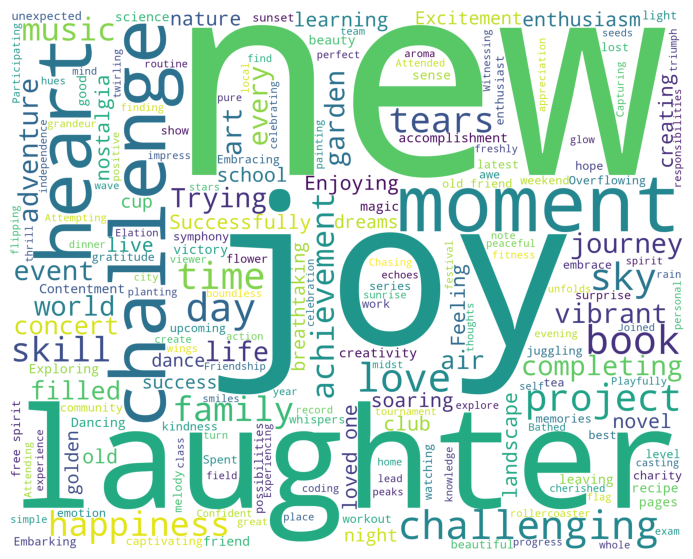

Negative Word Cloud


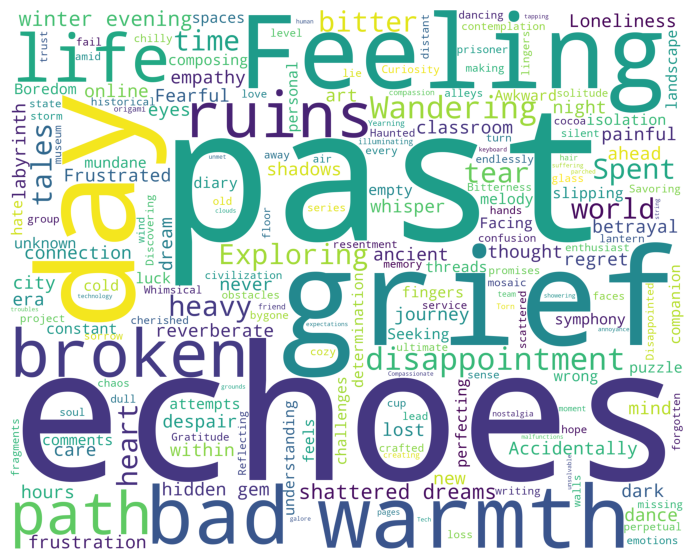

In [147]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
    wordcloud = WordCloud(width = 2500, height = 2000, background_color = color, stopwords = STOPWORDS).generate(cleaned_word)
    plt.figure(figsize = (10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
print("Positive Word Cloud")
wordcloud_draw(train_positive,'white')
print("Negative Word Cloud")
wordcloud_draw(train_negative)

In [1]:
tweets = []
stopwords = set(stopwords.words('english'))
for index, row in train.iterrows():
    filtered_words = [e.lower() for e in row.Text.split() if len(e)>=3]
    cleaned_words = [word for word in filtered_words if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT']
    words_without_stopwords = [word for word in cleaned_words if word not in stopwords]
    tweets.append((cleaned_words, row.Sentiment))

NameError: name 'stopwords' is not defined

In [152]:
test_positive = test[test['Sentiment'] == 'Positive']
test_positive = test_positive['Text']
test_negative = test[test['Sentiment'] == 'Negative']
test_negative = test_negative['Text']

In [166]:
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = list(wordlist.keys())
    return word_features

word_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

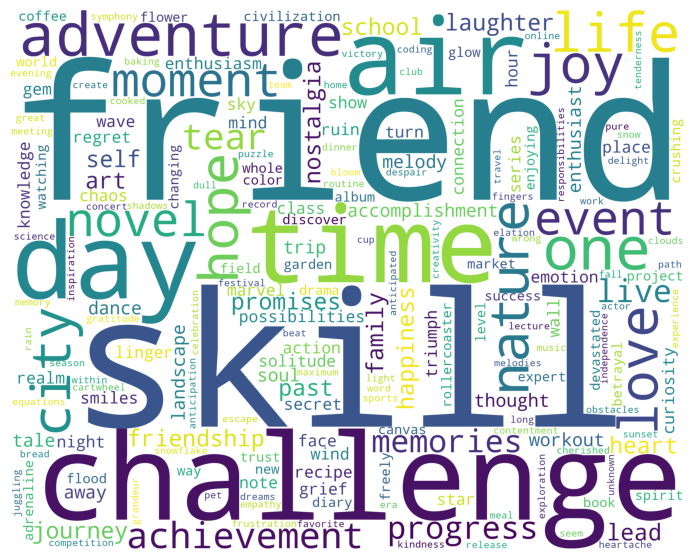

In [167]:
wordcloud_draw(word_features)

In [168]:
training_set = nltk.classify.apply_features(extract_features, tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [172]:
negative_count = 0
positive_count = 0
for object in test_negative:
    res = classifier.classify(extract_features(object.split()))
    if res == 'Negative':
        negative_count += 1
for object in test_positive:
    res = classifier.classify(extract_features(object.split()))
    if res == 'Positive':
        positive_count += 1
print('[Negative]: %s/%s' % (len(test_negative), negative_count))
print('[Positive]: %s/%s' % (len(test_positive), positive_count))

[Negative]: 13/3
[Positive]: 28/28


In [170]:
negative_count = 0
positive_count = 0
for object in train_negative:
    res = classifier.classify(extract_features(object.split()))
    if res == 'Negative':
        negative_count += 1
for object in train_positive:
    res = classifier.classify(extract_features(object.split()))
    if res == 'Positive':
        positive_count += 1
print('[Negative]: %s/%s' % (len(train_negative), negative_count))
print('[Positive]: %s/%s' % (len(train_positive), positive_count))

[Negative]: 106/92
[Positive]: 261/260
